----
# Laboratorium 6 - Układy stabilne i minimalnofazowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----

* badanie stabilności układu (stabilność w sensie BIBO) 
* analiza układów zamkniętych pętlą sprzężenia zwrotnego
* analiza układów minimalnofazowych
* zera i bieguny transmitancji  

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
poles_figsize  =(8, 8)
default_figsize=(14, 8)

---- 
## 1. Pojęcie stabilności
---- 
* Co to znaczy że układ jest stabilny?
* Jakie są kryteria stabilności?
* Jak sprawdzić czy układ jest stabilny?

---- 
## 2. Zbadaj stabilność w sensie BIBO
---- 
| | |
|------------------------------------------|------------------------------------|
|$$H(s) = {{s^2-2s+3} \over {s^2+2s+ 1}}$$  |  $$H(s) = {{s^2+1}\over{s^2+3s+1}}$$|
|$$ H(s) = {{1} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +8s+15}} $$|
|$$ H(s) = {{s^2-2s+3} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +6s-7}} $$|
|$$ H(s) = {{s + 2} \over {s + 1}} $$  |$$ H(s) = {{1} \over {s+1}} $$|
|$$ H(s) = {{s - 1} \over {s + 1}} $$|$$ H(s) = {{1} \over {s-1}} $$|
|$$ H(s) = {{2s+3} \over {s^2 + 4s + 4}} $$|$$ H(s) = {{s+1} \over {s+ 2}} $$|
|$$ H(s) = {{s^4+2s^3+2s^2+2} \over {s^3-2s^2 + 4s + 1}} $$|$$ H(s) = {{s-1} \over {s+ 2}} $$|
W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję np.poly1d oraz np.roots. Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami. 


In [7]:
#define list of denominators
denominators = [ [1,2,1], [1,0,2], [1,1], [1,4,4], [1,-2,4,1], [1,3,1], [1,8,15], [1,6,7], [1,-1], [1,2] ] #lista wektorów, koljenych mianowników do sprawdzenia biegunów

#for each denominator from list - calculate roots
for A in denominators:
    polynom = np.poly1d(A) #tworzenie matematycznie każdego mianownika, potrzebnego to liczenia biegunów
    poles = np.roots(polynom) #oblicznie biegunów
    print("mianownik={} bieguny={}".format(A, poles))



mianownik=[1, 2, 1] bieguny=[-1. -1.]
mianownik=[1, 0, 2] bieguny=[-0.+1.41421356j  0.-1.41421356j]
mianownik=[1, 1] bieguny=[-1.]
mianownik=[1, 4, 4] bieguny=[-2. -2.]
mianownik=[1, -2, 4, 1] bieguny=[ 1.11124726+1.80544243j  1.11124726-1.80544243j -0.22249451+0.j        ]
mianownik=[1, 3, 1] bieguny=[-2.61803399 -0.38196601]
mianownik=[1, 8, 15] bieguny=[-5. -3.]
mianownik=[1, 6, 7] bieguny=[-4.41421356 -1.58578644]
mianownik=[1, -1] bieguny=[1.]
mianownik=[1, 2] bieguny=[-2.]


----
## 3. Sprawdź właściwości systemów
-----------------
* na 1. wykresie umieść charakterystyki amplitudowe wszystkich układów
* na 2. wykresie umieść charakterystyki fazowe wszystkich układów
* na 3. wykresie zaznacz połóożenie zer biegonów dla wszystkich układów

Transmitancje układów:
$$H_1(s) = {{s^2+6s+8} \over {s^2+2s+ 3}}$$
$$H_2(s) = {{s^2-2s-8} \over {s^2+2s+ 3}}$$
$$H_3(s) = {{s^2-6s+8} \over {s^2+2s+ 3}}$$
$$H_4(s) = {{s^2+2s-8} \over {s^2+2s+ 3}}$$

Wskaż układ minimalnofazowy



No handles with labels found to put in legend.
/tmp/ipykernel_3314/3272165783.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figMP.show()
/tmp/ipykernel_3314/3272165783.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figZP.show()


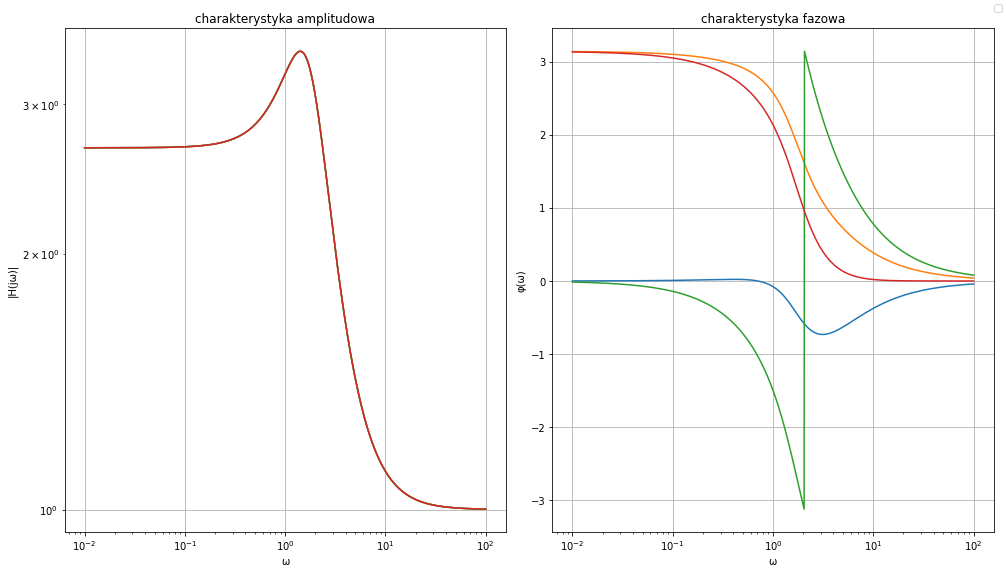

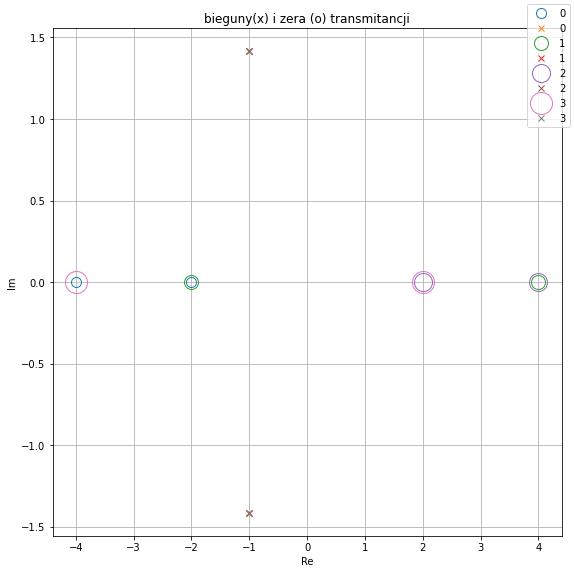

In [27]:
#define list of numerators #liczniki
numerators = [[1, 6, 8],
              [1,-2,-8],
              [1,-6, 8],
              [1, 2,-8]
]
#define denominator
denominator = [1, 2, 3] #wspólny dla wsztkich mianownik
#define w (omega)
w = np.logspace(-2,2,1000)
s = w *1j
#wskaźniki na wykresy
figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize)
figZP, axZP  = plt.subplots(1, 1, figsize=poles_figsize  )

#to idx to poprostu indesky kolejnych mianownikow
for idx, numerator in enumerate(numerators): #wybieramy konkretny jeden licznik z tablicy liczników i na nim działamy
    #charakterystyka amplitudowa
    Licznik = np.poly1d(numerator)
    Mianownik = np.poly1d(denominator)
    H = Licznik(s)/Mianownik(s)
    M = np.abs(H) #
    axsMP[0].loglog(w, M)
    #charakterystyka fazowa
    F = np.angle(H)
    axsMP[1].semilogx(w, F)
    #zera i bieguny transmitancji - transmitancja ma być równa 0, przyrównujemy licznik do 0 -> mp.roots(Licznik)
    zera = np.roots(Licznik)
    bieguny = np.roots(Mianownik)
    #to całe markersize->ustawia okręgi dookoła zer transmitancji, coraz większe kółko dla kolejnych z tablicy
    axZP.plot(zera.real, zera.imag, 'o', markerfacecolor='none', markersize = 10+idx*4, label=str(idx)) #na legendzie o - zera transmitancji -> 4 rózne liczniki rózne zera transmitancji
    
    axZP.plot(bieguny.real, bieguny.imag, 'x', label=str(idx)) #x - bieguny transmitanjci -> w teorii 4 bieguny, ale jeden mianownik daje jeden wynik
    
    

axsMP[0].set_title("charakterystyka amplitudowa")
axsMP[0].set_xlabel("ω")
axsMP[0].set_ylabel("|H(jω)|")
axsMP[0].grid()
axsMP[1].set_title("charakterystyka fazowa")
axsMP[1].set_xlabel("ω")
axsMP[1].set_ylabel("φ(ω)")
axsMP[1].grid()
figMP.legend()
figMP.tight_layout()
figMP.show()

axZP.set_title("bieguny(x) i zera (o) transmitancji")
axZP.set_xlabel("Re")
axZP.set_ylabel("Im") 
axZP.grid()
figZP.tight_layout()
figZP.show()
figZP.legend()

In [ ]:
WNIOSEK
-TO, że mianowniki są takie same nie oznacza, że charakterystki amplitudowe będą takie same
-Układ jest BIBO stabilny, czyli bieguny muszą być z lewej strony zespolonego układu współrzędnych.
-Układ jest minimalnofazowy, jeżeli zera transmitancji są z lewej strony ORAZ układ jest BIBO stabilny.
-W zarówno bieguny jak i zera muszą być z lewej strony.